#### Aline Rodrigheri Ioste

# Descrição do Problema: 
Construir um classificador de produtos que recebe um conjunto de características de um produto e retorne a sua categoria.


# Parte 1 - Análise Exploratória

O dataset disponivel para a solução do problema é composto de uma amostragem de dados da plataforma do Elo7.
O dataset disponivel contém 38.507 registros distribuídos em 5 categorias (Bebê, Bijuterias e Jóias, Decoração, Lembrancinhas, Papel e Cia e Outros).

#### Anaĺise dos campos que podem ser considerados classificatórios para a identificação do produto

Para construir um modelo classificador de produtos a partir de suas características precisamos analisar se existem campos disponiveis no dataset determinantes para a identificação da categoria dos produtos.


##### Importação da base de dados disponibilizada pelo ELO7

In [1]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

dataset=pd.read_csv("data/elo7_recruitment_dataset.csv")

In [2]:
dataset.head(5)

,product_id,seller_id,query,search_page,position,title,concatenated_tags,creation_date,price,weight,express_delivery,minimum_quantity,view_counts,order_counts,category
0,11394449,8324141,espirito santo,2,6,Mandala Espírito Santo,mandala mdf,2015-11-14 19:42:12,171.890000,1200.0,1,4,244,NaN,Decoração
1,15534262,6939286,cartao de visita,2,0,Cartão de Visita,cartao visita panfletos tag adesivos copos lon...,2018-04-04 20:55:07,77.670000,8.0,1,5,124,NaN,Papel e Cia
2,16153119,9835835,expositor de esmaltes,1,38,Organizador expositor p/ 70 esmaltes,expositor,2018-10-13 20:57:07,73.920006,2709.0,1,1,59,NaN,Outros
3,15877252,8071206,medidas lencol para berco americano,1,6,Jogo de Lençol Berço Estampado,t jogo lencol menino lencol berco,2017-02-27 13:26:03,118.770004,0.0,1,1,180,1.0,Bebê
4,15917108,7200773,adesivo box banheiro,3,38,ADESIVO BOX DE BANHEIRO,adesivo box banheiro,2017-05-09 13:18:38,191.810000,507.0,1,6,34,NaN,Decoração


####  Matriz de Correlação de Pearson

Como prova matematicamente da correlação entre os campos criaremos uma matriz de correlação para analisar as correlações entre os campos. A matriz demonstrará a correlação do grau de relação linear entre cada campo do dataset.
Os valores de correlação da matriz são compostos por uma variação entre -1 e +1, sendo considerados variáveis altamente correlacionados os que obterem valores de correlação maiores que 0,7 tanto positivos como negativos.

##### Transformação da Categoria em valores numéricos

In [3]:
category = {'Bebê': '1',
         'Bijuterias e Jóias': '2',
         'Decoração': '3',
         'Lembrancinhas': '4',
         'Papel e Cia': '5',
         'Outros': '6'}
         
dataset = dataset.replace(category)


Matriz de correlação entre todas os campos disponiveis do dataset

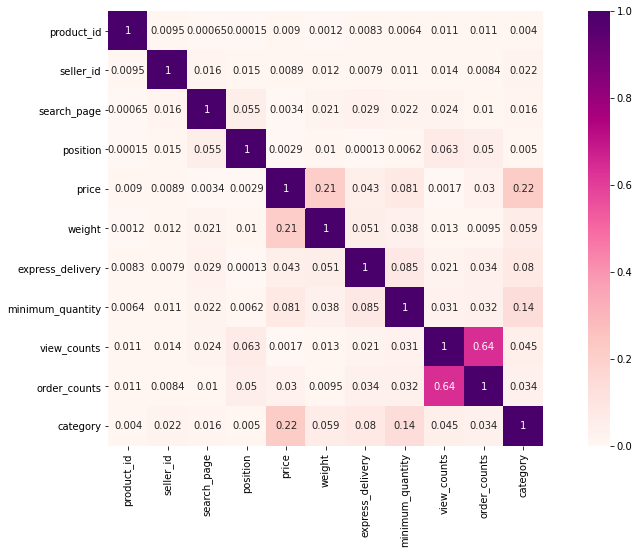

In [4]:
datasetcorr = dataset
datasetcorr['category'] = datasetcorr['category'].astype(int)

corrmat = abs(datasetcorr.corr())

f, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(abs(datasetcorr.corr()),
             vmin = 0.0,
            square=True, annot=True, vmax=1.0, cmap='RdPu')

Matriz de correlação entre os campos disponiveis no dataset com o campo categoria

**Matriz de correlação**

Na Matriz de correlação podemos notar que os campos 'product_id' , 'seller_id', 'search_page', 'position','creation_date', 'express_delivery', 'minimum_quantity', 'view_counts', 'order_counts', possuem correlações insignificantes entre eles, sendo encontrado somente uma correlação de 0.6 entre os campos view_counts e order_counts, porém este valores não representam nenhuma correlação com a categorização do produto.

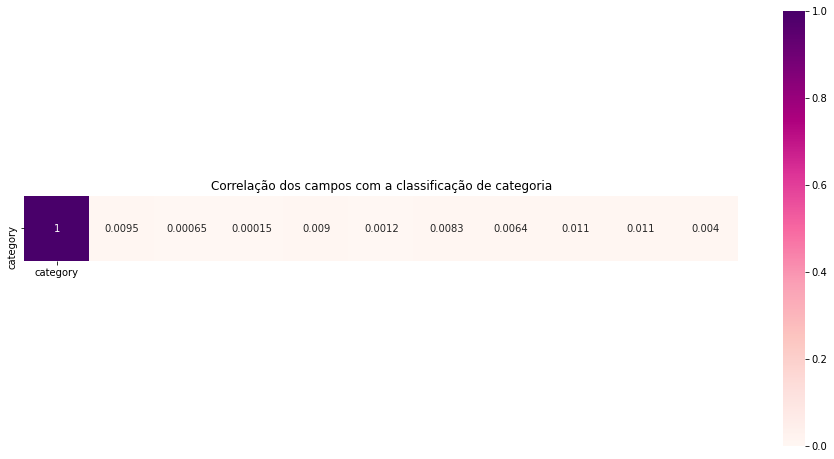

In [5]:
corrmat = abs(datasetcorr.corr())
# Correlation with output variable
cor_target = corrmat['category']
# Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5].index.tolist()

f, ax = plt.subplots(figsize=(16, 8))
plt.title('Correlação dos campos com a classificação de categoria')
sns.heatmap(abs(datasetcorr.corr().iloc[0:1, :]),
            yticklabels=[relevant_features[0]], xticklabels=relevant_features, vmin = 0.0,
            square=True, annot=True, vmax=1.0, cmap='RdPu')


Note que medindo a correlação de pearson dos campos disponiveis com a categoria do produto podemos avaliar que não existem correlações suficientes eles eles para determinar a classificação dos produtos através destas caracteristicas.

####  Anaĺise da distribuição das categorias dos produtos no dataset de amostragem

Precisamos avaliar a distribuição das categorias no dataset, a fim de avaliar se temos registros suficientes de cada categoria para que o modelo possa "aprender" a classificar o produto.

Estão disponiveis no dataset 38.507 registros, sendo:

In [6]:
dataset['category'].value_counts().head()

4    17759
3     8846
1     7026
5     2777
6     1148
Name: category, dtype: int64

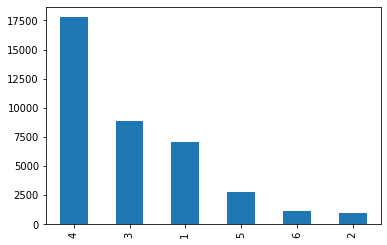

In [7]:
dataset['category'].value_counts().plot(kind = 'bar')
plt.show()

A partir da análise da distribuição podemos avaliar que os produtos com maior quantidade de registros terão a maior probabilidade de que o modelo aprenda sua classificação.


####  Exclução dos campos que não são fatores determinantes para categorização dos produtos 

Podemos excluir os campos do dataset que evidenciamos matematicamente que não possuem correlação.
Sendo os campos que não tem correlação matemática com a categorização dos produtos.

In [8]:
#ID do produto não é um fator determinando para classificação
dataset = dataset.drop(['product_id'],axis=1) 

# Um vendedor pode trabalhar com vários produtos então não é um fator determinando para classificação
dataset = dataset.drop(['seller_id'],axis=1) 

#número de páginas que apareceu não é um fator determinando para classificação
dataset = dataset.drop(['search_page'],axis=1) 

#Posição do produto não é um fator determinando para classificação
dataset = dataset.drop(['position'],axis=1) 

#Data de criação do produto na plataforma do Elo7 não é um fator determinando para classificação
dataset = dataset.drop(['creation_date'],axis=1) 

#Se o produto é pronta entrega ou não, não é um fator determinando para classificação
dataset = dataset.drop(['express_delivery'],axis=1) 

#Quantidade de unidades mínima necessária para compra não é um fator determinando para classificação.
dataset = dataset.drop(['minimum_quantity'],axis=1)

#Número de cliques no produto nos últimos três meses não é um fator determinando para classificação
dataset = dataset.drop(['view_counts'],axis=1)

#Número de vezes que o produto foi comprado nos últimos três meses não é um fator determinando para classificação
dataset = dataset.drop(['order_counts'],axis=1)

In [9]:
dataset.head(10)

,query,title,concatenated_tags,price,weight,category
0,espirito santo,Mandala Espírito Santo,mandala mdf,171.890000,1200.0,3
1,cartao de visita,Cartão de Visita,cartao visita panfletos tag adesivos copos lon...,77.670000,8.0,5
2,expositor de esmaltes,Organizador expositor p/ 70 esmaltes,expositor,73.920006,2709.0,6
3,medidas lencol para berco americano,Jogo de Lençol Berço Estampado,t jogo lencol menino lencol berco,118.770004,0.0,1
4,adesivo box banheiro,ADESIVO BOX DE BANHEIRO,adesivo box banheiro,191.810000,507.0,3
5,dia dos pais,Álbum de figurinhas dia dos pais,albuns figurinhas pai lucas album fotos,49.970000,208.0,4
6,arranjo de flores para mesa,Arranjo de Flores - Orquidias,mini arranjos,23.670000,207.0,3
7,lembrancinha maternidade,Kit Aromarizador + sacola / Lembrancinha Mater...,bb lembrancinhas maternidade baby lembranca ma...,12.710000,55.0,4
8,chaveiro dia dos pais,chaveiro dia dos pais,dia pais,11.420000,6.0,4
9,manta personalizada,Manta para bebê personalizada de Nuvem com nome,nascimento manta baby cha bebe vestido bebe,107.100000,9.0,1


Podemos então evidenciar que dos 15 itens disponivel no dataset 11 deles não apresentaram correlação suficientes para a identificação da categoria do produto.

Desda forma qualquer solução que necessite de analises de caracteristicas estruturadas estão descartadas.



Por exemplo note que a correlação da categoria com o peso e com o tamanho não existem.

In [10]:
import scipy
from scipy import stats

X = (dataset['weight'].values)
Y = (dataset['category'].values)
X = X .astype(int)
Y = Y.astype(int)
pearson, x = scipy.stats.stats.pearsonr(X, Y)
print(pearson)

-0.01720542600855266


In [11]:
import scipy
from scipy import stats

X = (dataset['price'].values)
Y = (dataset['category'].values)
X = X .astype(int)
Y = Y.astype(int)
pearson, x = scipy.stats.stats.pearsonr(X, Y)
print(pearson)

-0.2196037673737705


Note que também não existem correlações suficientes, tendo o tamanho uma correlação da categoria de -0.017 e com o preço de -0.219, ou seja estes campos também não contribuem para a identificação do produto podendo ser excluidos do dataset.

In [12]:
#Número de cliques no produto nos últimos três meses não é um fator determinando para classificação
dataset = dataset.drop(['price'],axis=1)

#Número de vezes que o produto foi comprado nos últimos três meses não é um fator determinando para classificação
dataset = dataset.drop(['weight'],axis=1)

Precisamos então pensar em uma solução do problema baseado nos campos de valores não estruturados para criar um modelo que seja capaz de aprender baseado em textos livres, baseados na análise dos campos como titulo, query e tags.

O modelo fará um minetismo da forma humana de classificar os produtos através de textos não estruturados. 

Note que os fatores determinantes para a classifação dos produtos são os campos com texto livres.
Baseado nas 6 possiveis categorias humanamente podemos classificar com alta precisão a categoria do produto, apenas lendo os campos como query, title ou concatenarted_tags.
O ideal seria que nosso modelo pudesse fazer o mesmo, pois as outras caracteristicas não são relevantes para a classificação do produto, conforme demonstrado na análise exploratória dos dados. 

In [13]:
dataset.head(10)

,query,title,concatenated_tags,category
0,espirito santo,Mandala Espírito Santo,mandala mdf,3
1,cartao de visita,Cartão de Visita,cartao visita panfletos tag adesivos copos lon...,5
2,expositor de esmaltes,Organizador expositor p/ 70 esmaltes,expositor,6
3,medidas lencol para berco americano,Jogo de Lençol Berço Estampado,t jogo lencol menino lencol berco,1
4,adesivo box banheiro,ADESIVO BOX DE BANHEIRO,adesivo box banheiro,3
5,dia dos pais,Álbum de figurinhas dia dos pais,albuns figurinhas pai lucas album fotos,4
6,arranjo de flores para mesa,Arranjo de Flores - Orquidias,mini arranjos,3
7,lembrancinha maternidade,Kit Aromarizador + sacola / Lembrancinha Mater...,bb lembrancinhas maternidade baby lembranca ma...,4
8,chaveiro dia dos pais,chaveiro dia dos pais,dia pais,4
9,manta personalizada,Manta para bebê personalizada de Nuvem com nome,nascimento manta baby cha bebe vestido bebe,1


Temos então 3 fortes candidados como query - termo de busca inserido pelo usuário, title - título do produto e a 
concatenated_tags - tags do produto inseridas pelo vendedor.
Podemos por pensamento empirico determinar que estes são os fatores determinantes para classificação do produto, pois são os fatores que os usuários do site usam para buscar os produtos, ou seja através destes itens de buscam podemos facilmente classificar o produto corretamente.
O desafio aqui é criar um modelo que possa usar os mesmos fatores para determinar a classificação o produto.
Para fazer um minetismo da forma de classificação dos usuários do site, vamos usar os dados não estruturados para determinar a classificação dos produtos.

#### Análise do tamanho do Corpus

In [14]:
words = list(set(dataset["title"].values))
num_words = len(words)
print(f"Total de palavras unicas no titulo: {num_words}")

words = list(set(dataset["concatenated_tags"].values))
num_words = len(words)
print(f"Total de palavras unicas nas tags: {num_words}")

words = list(set(dataset["query"].values))
num_words = len(words)
print(f"Total de palavras unicas no Query: {num_words}")

Total de palavras unicas no titulo: 25355
Total de palavras unicas nas tags: 23011
Total de palavras unicas no Query: 6397


Note que o corpus de palavras no titulo e nas tags estão muito próximos, estão entre +- 23 mil a +-25 mil. 
Este é o tamanho do corpus, ou seja quantidade de palavras únicas usados para determinar a classificação dos produtos.
O corpus de query tem uma redução de +- 6 mil palavras. 
Precisamos então avaliar qual seria o corpus com maior indice de precisão para classificação de produto. 
Podendo ser os campos com maior quantidade de palavras unicas ou o campo com menor quantidade de palavras.



#### Tratamento do Corpus


#### Tokenizer
Para que um modelo possa analisar estes dados precisamos transformar estes dados para valores numéricos.
Um valor numérico será atribuído a um número de n-grams por sequência. Vamos precisar usar uma função de tokenização.
O Tokenizer disponivel na biblioteca do keras, esta função vai determina um index para cada palavra presente no corpus.


Os valores devem ser formatados de modo que todas as sequências tenham o mesmo tamanho, que no caso do texto podemos analisar que tem tamanhos distintos.Então precisamos utilizar a função pad_sequences,também do keras, que será responsável por truncar as sequências maiores e completar as sequências menores com zeros.

Criaremos funções para testar nosso modelo com os dois corpus title e query. Desta forma podemos testar qual delas terá a maior precisão para classificação dos produtos.
Como os campos são textos livres, não estruturados, um deles terá a melhor classificação.

In [15]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [16]:
max_features_title = 25355
max_features_query = 6397
data = dataset

data.head(2)

,query,title,concatenated_tags,category
0,espirito santo,Mandala Espírito Santo,mandala mdf,3
1,cartao de visita,Cartão de Visita,cartao visita panfletos tag adesivos copos lon...,5


In [17]:
max_features_title = 25355
max_features_query = 6397
data = dataset

max_fatures = max_features_title
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data['title'].values)
X = tokenizer.texts_to_sequences(data['title'].values)
X = pad_sequences(X)
Y = pd.get_dummies(data['category']).values


X_title, Y_title = X , Y


max_fatures = max_features_query
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data['query'].values)
X = tokenizer.texts_to_sequences(data['query'].values)
X = pad_sequences(X)
Y = pd.get_dummies(data['category']).values


X_query, Y_query = X , Y

##### Criação da base do corpus

Vamos criar um conjunto de base de treinamento contendo o corpus disponivel no 'title', onde teremos a variável X_title contendo os corpus do title e a variável Y_title contendo a classificação dos produtos, campo 'category'. 
Este campo será usado pelo modelo para "aprender" através do corpus qual a categoria do produto.
Da mesma forma teremos o corpus de 'query'.

In [18]:
###### Corpus de Title
print(X_title.shape,Y_title.shape)

(38507, 14) (38507, 6)


In [19]:
###### Corpus de query
print(X_query.shape,Y_query.shape)

(38507, 15) (38507, 6)


Tendo o conjunto de arrays de X_title de tamanho de [38507,14] and e Y_title [38507,6] e X_query de tamanho de [38507,15] and e Y_title [38507,6].

#### Dataset de Treinamento e Validação

Tendo os conjunto de dados pre processados de forma que um modelo de máquina possa interpretá-los. 
Vamos então separar os dados entre dados de treinamento e de validação para avaliar a precisão do nossos modelos.
Vamos então dividir os dados entre 80% para treinamento e 20% para validação do modelo.


In [20]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

#### Dataset de classificação pelo titulo

In [21]:
(X_train_title, X_test_title,
 Y_train_title, Y_test_title) = train_test_split(X_title, Y_title, test_size = 0.20, random_state = 42)

In [22]:
print(Y_train_title.shape)
print(Y_test_title.shape)

(30805, 6)
(7702, 6)


#### Dataset de classificação pela query

In [23]:
(X_train_query, X_test_query,
 Y_train_query, Y_test_query) = train_test_split(X_query, Y_query, test_size = 0.20, random_state = 42)

In [24]:
print(Y_train_query.shape)
print(Y_test_query.shape)

(30805, 6)
(7702, 6)


Tendo o dataset de treinamento de 30.805 divididos por 6 para treinamento e 7.702 divididos por 6 para validação do modelo tanto para o corpus de 'title' como o de 'query'.

Temos então 30.805 registros para treinamento do modelo e 7.702 registro para a validação do modelo para cada corpus.

# Parte 2 - Sistema de Classificação de Produtos

### Técnica escolhida para desenvolvimento do modelo

Vamos criar um modelo usando tecnicas mais avançadas de treinamento de máquina, usando aprendizado produndo. 
Deep Learning com redes neurais recorrentes para a classificação dos produtos usando dados não estruturados.


O objetivo é ter um modelo que classifique os dados como os seres humanos, nos não lemos cada palavra com um significado único, mas  vamos lendo as palavras e formando a interpretação baseada na palavra anterior, ou seja nossos pensamentos tem persistência.

Com modelos tradicionais isso seria impossivel, até mesmo se tratando de redes neurais tradicionais, a necessidade de ter persistência dificulta a aplicação por metodos tradicionais.
Para resolver este problema de classificação de produto baseado em textos não estruturados precisamos usar modelos mais avançados.

O modelo precisa levar em consideração não somente as palavras mais as palavras anteriores, tendo uma peristência, assim como um ser humano faria.

As Redes neurais recorrentes podem resolver esse problema, pois estas redes possuem um aprendizado com loops, e isso permite que o modelo aprenda com informações persistentes, assim como nós seres humanos classificariamos os produtos apenas lendo os textos.

Uma rede neural recorrente são redes de múltiplas cópias da mesma rede, onde cada rede passa uma mensagem a uma rede sucessora, desta forma podemos criar a persistencia que precisamos para resolver o problema de classificação de produto baseado nos textos livres dos campos como title ou query.

###  Técnica escolhida para desenvolvimento do modelo

### Redes Neurais Recorrentes

Definindo a técnica que melhor se adequa ao problema vamos utilizar a biblioteca keras para produzir o modelo de rede neural recorrentes.
Vamos definir as camadas do tipo Embedding, LSTM e Dense, sendo:

* **Embedding** que são as camadas da rede que aprende as representações mais relevantes para as camandas posteriores.
* **LSTM** que são as camadas da rede que permite que as sequências sejam tratadas como um conjunto de dados onde o contexto relevante para que o determinado atributo. 
* **Dense** que são as camadas utilizadas para fazer o processo de transformação da representação produzida pelo LSTM até se atingir a camanda final de neurônios que servirá de camanda de saída.


O corpus máximo determinado conforme as palavras únicas encontradas em cada corpus.

In [25]:
max_features_title = 25355
max_features_query = 6397

O modelo terá camadas de Embedding de 128 e LSTM de 196. 
Teremos um dropout de 0.5 para evitar que a rede decorre o cada, ao invés de aprender.
Como temos 6 categorias teremos uma Dense de 6 neuromios para determinar as 6 possiveis saidas. 

In [26]:
embed_dim = 128
lstm_out  = 196
dropout   = 0.5

In [27]:
def CreateModel(max_fatures, X):
    model = Sequential()
    model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
    model.add(SpatialDropout1D(0.4))
    model.add(LSTM(lstm_out, dropout=0.5, recurrent_dropout=0.5))
    model.add(Dense(6,activation='softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
    print(model.summary())
    return model


Model_title= CreateModel(max_features_title,X_train_title )
Model_query= CreateModel(max_features_query,X_train_query )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 14, 128)           3245440   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 14, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 1182      
Total params: 3,501,422
Trainable params: 3,501,422
Non-trainable params: 0
_________________________________________________________________
None
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 15, 128)           818816    
_____________________________________________________________

Os dois modelos estão criados tendo uma rede neural recorrente de 1,074,798 para a classificação dos produtos através do campo query e um modelo de 3,501,422 para a classificação dos produtos através do titulo.

### Treinamento dos modelos 

Para o treinamento do modelo vamos utilizar 20 epocas como ciclos de treinamento completo no conjunto de treinamento.
Vamos testar e comparar os modelos usando 20 ciclos, pois as quantidade de epocas suficientes para convergência variam de dados para dados. 
O objetivo de usar a mesma quantidade de epocas é ter a mesma metrica para avaliar a convergencia dos modelos.


In [28]:
batch_size = 32
epoch=20

Note que o modelo treinado no corpus de 'title' convergiu com maior acurácia com 20 ciclos do que o modelo treinando no corpus de 'query'.

#### Treinamento do modelo para a classificação de produto baseado no titulo

In [29]:
Model_title.fit(X_train_title, Y_train_title, epochs = epoch, batch_size=batch_size, verbose = 2)

Epoch 1/20
 - 183s - loss: 0.7223 - acc: 0.7557
Epoch 2/20
 - 192s - loss: 0.4086 - acc: 0.8677
Epoch 3/20
 - 183s - loss: 0.3365 - acc: 0.8881
Epoch 4/20
 - 174s - loss: 0.2961 - acc: 0.8996
Epoch 5/20
 - 181s - loss: 0.2682 - acc: 0.9080
Epoch 6/20
 - 183s - loss: 0.2487 - acc: 0.9127
Epoch 7/20
 - 161s - loss: 0.2344 - acc: 0.9174
Epoch 8/20
 - 150s - loss: 0.2238 - acc: 0.9206
Epoch 9/20
 - 150s - loss: 0.2138 - acc: 0.9237
Epoch 10/20
 - 149s - loss: 0.2041 - acc: 0.9281
Epoch 11/20
 - 150s - loss: 0.1965 - acc: 0.9294
Epoch 12/20
 - 152s - loss: 0.1891 - acc: 0.9321
Epoch 13/20
 - 152s - loss: 0.1857 - acc: 0.9311
Epoch 14/20
 - 148s - loss: 0.1756 - acc: 0.9366
Epoch 15/20
 - 150s - loss: 0.1710 - acc: 0.9377
Epoch 16/20
 - 145s - loss: 0.1664 - acc: 0.9395
Epoch 17/20
 - 149s - loss: 0.1622 - acc: 0.9410
Epoch 18/20
 - 150s - loss: 0.1592 - acc: 0.9408
Epoch 19/20
 - 151s - loss: 0.1533 - acc: 0.9431
Epoch 20/20
 - 147s - loss: 0.1505 - acc: 0.9435


Conforme demonstrado abaixo:
##### Modelo com aprendizagem no corpus do 'title'
Com épocas de 20/20, o modelo de aprendizagem no corpus do titulo obteve: uma perda de 0.1504 e acurácia de 0.9432.

#### Treinamento do modelo para a classificação de produto baseado no query

In [30]:
Model_query.fit(X_train_query, Y_train_query, epochs = epoch, batch_size=batch_size, verbose = 2)

Epoch 1/20
 - 110s - loss: 0.8130 - acc: 0.7262
Epoch 2/20
 - 107s - loss: 0.5300 - acc: 0.8300
Epoch 3/20
 - 106s - loss: 0.4747 - acc: 0.8446
Epoch 4/20
 - 106s - loss: 0.4475 - acc: 0.8516
Epoch 5/20
 - 107s - loss: 0.4334 - acc: 0.8527
Epoch 6/20
 - 106s - loss: 0.4229 - acc: 0.8545
Epoch 7/20
 - 110s - loss: 0.4129 - acc: 0.8562
Epoch 8/20
 - 105s - loss: 0.4045 - acc: 0.8597
Epoch 9/20
 - 104s - loss: 0.4020 - acc: 0.8575
Epoch 10/20
 - 108s - loss: 0.3945 - acc: 0.8582
Epoch 11/20
 - 105s - loss: 0.3910 - acc: 0.8605
Epoch 12/20
 - 109s - loss: 0.3864 - acc: 0.8615
Epoch 13/20
 - 102s - loss: 0.3838 - acc: 0.8629
Epoch 14/20
 - 108s - loss: 0.3799 - acc: 0.8635
Epoch 15/20
 - 104s - loss: 0.3761 - acc: 0.8638
Epoch 16/20
 - 104s - loss: 0.3739 - acc: 0.8639
Epoch 17/20
 - 109s - loss: 0.3709 - acc: 0.8643
Epoch 18/20
 - 112s - loss: 0.3671 - acc: 0.8646
Epoch 19/20
 - 126s - loss: 0.3650 - acc: 0.8669
Epoch 20/20
 - 130s - loss: 0.3623 - acc: 0.8667


 
##### Modelo com aprendizagem no corpus do 'query'
Com épocas de 20/20, o modelo de aprendizagem no corpus do titulo obteve: uma perda de 0.3621 e acurácia de 0.8677.

Note que para o modelo de aprendizagem pelo corpus do campo query seriam necessárioss mais épocas para maior aprendizagem do modelo.


# Parte 3 - Avaliação do Sistema de Classificação

Para a avaliação dos modelos vamos utilizar as metricas:
    
* A **acurácia** é uma boa indicação geral de como o modelo performou.
* A **precisão** pode ser usada em uma situação em que os Falsos Positivos são considerados mais prejudiciais que os Falsos Negativos.
* O recall pode ser usada em uma situação em que os Falsos Negativos são considerados mais prejudiciais que os Falsos Positivos. 
* O **f1-Score** é simplesmente uma maneira de observar somente 1 métrica ao invés de duas (precisão e recall) em alguma situação.


In [31]:
def ClassificyPredict(classifier, X_test,Y_test ):
    # Predizendo os resultados do conjunto de teste
    y_pred = classifier.predict(X_test)
    y_pred = (y_pred > 0.5)
    
    from sklearn.metrics import accuracy_score
    print('Acurácia: %.2f%%' % (accuracy_score(Y_test, y_pred)*100))
    
    from sklearn.metrics import classification_report
    print(classification_report(Y_test, y_pred))

Note que o modelo com a análise do titulo teve uma maior acurácia do que o modelo com análise do query.
Intuitivamenente era esperado devido ao modelo usar um corpus maior para a classificação dos produtos de 25355 para titulos contra 6397 das querys.


In [32]:
ClassificyPredict(Model_title, X_test_title, Y_test_title)

Acurácia: 88.43%
              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1405
           1       0.92      0.93      0.92       171
           2       0.90      0.90      0.90      1776
           3       0.90      0.93      0.91      3573
           4       0.77      0.73      0.75       567
           5       0.84      0.70      0.76       210

   micro avg       0.89      0.88      0.89      7702
   macro avg       0.87      0.84      0.85      7702
weighted avg       0.89      0.88      0.89      7702
 samples avg       0.88      0.88      0.88      7702



/home/aline/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


Conseguimos obter uma classificação dos produtos de 88.43% de acurácia usando uma rede neural recorrente com analise dos campos textos não estruturados.

##### Modelo de Redes Neurais Recorrentes usando o corpus do campo "title"
O modelo obteve a acurácia de 88.43% em 7.702 registros de validação.

**Acurácia de 88.43%**

In [33]:
ClassificyPredict(Model_query , X_test_query, Y_test_query)

Acurácia: 82.98%
              precision    recall  f1-score   support

           0       0.90      0.76      0.83      1405
           1       0.85      0.86      0.85       171
           2       0.84      0.85      0.85      1776
           3       0.87      0.89      0.88      3573
           4       0.73      0.62      0.67       567
           5       0.72      0.59      0.65       210

   micro avg       0.85      0.83      0.84      7702
   macro avg       0.82      0.76      0.79      7702
weighted avg       0.85      0.83      0.84      7702
 samples avg       0.83      0.83      0.83      7702



/home/aline/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)



##### Modelo de Redes Neurais Recorrentes usando o corpus do campo "query"
O modelo obteve a acurácia de 82.98% em 7.702 registros de validação.

**Acurácia de 82.98%**


### 14 - Conclusão 

O modelo de categorização de produtos usando o corpus do title obteve melhor métrica com menor ciclo de treinamento, tendo -+88,% de acurácia e o modelo usando o corpus do campo 'query' também obteve bons resultados sendo necessário usar mais epocas para obter um maior ganho de precisão. 
Para testes futuros no modelo podemos reduzir o tamanho do corpus levando em consideração as palavras de maior frequencia, assim como também avaliar os modelos com maior clicos de treinamentos para garantir maior precisão dos modelos.
O objetivo destas demonstração foi avaliar a possibilidade de criar um modelo de classificação de produtos baseados em suas caracteristicas disponiveis do dataset disponibilizado pelo Elo7.
